In [3]:
import tensorflow as tf  # import libraries
import numpy as np
import matplotlib.pyplot as plt

#check tensorflow version
print(tf.__version__)

2.9.2


In [4]:
from keras.datasets import fashion_mnist #import data
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data() #load data

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ["T-shirt/top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneakers", "bag", "ankle boot"] #define class names

In [6]:
print(X_train_full.shape) #explore data, check shape 
print(y_train_full.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
X_train_full.dtype #explore data, check data type
y_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0 #preprocession, normalisation, recale the pixel values from 0-255 to the range of 0-1 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

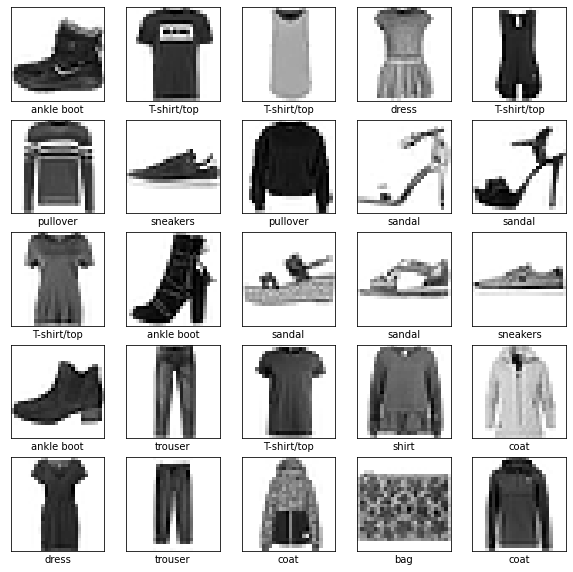

In [12]:
plt.figure(figsize=(10,10))  #Display first 25 images and its names from the training set

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train_full[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [15]:
model = tf.keras.models.Sequential()  #Use Keras sequential API to build your model
model.add(tf.keras.layers.Flatten(input_shape= [28,28]))
model.add(tf.keras.layers.Dense(300, activation = "relu"))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape= [28,28]), 
    tf.keras.layers.Dense(300, activation = "relu"), 
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")] )
#create our sequential model

In [20]:
model.summary() #Model Summary

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss = "sparse_categorical_crossentropy",
               optimizer= "sgd", 
               metrics=["accuracy"]) #Tweak learned parameters (learning rate, optimizers, loss functions etc)

In [25]:
history = model.fit(X_train, y_train, epochs = 30, validation_data= (X_valid, y_valid)) # Train the model with epochs = 30

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7103 - accuracy: 0.7655 - val_loss: 0.5131 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4882 - accuracy: 0.8298 - val_loss: 0.4608 - val_accuracy: 0.8402
Epoch 3/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4429 - accuracy: 0.8452 - val_loss: 0.4324 - val_accuracy: 0.8510
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4173 - accuracy: 0.8539 - val_loss: 0.3946 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3967 - accuracy: 0.8588 - val_loss: 0.3827 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3798 - accuracy: 0.8663 - val_loss: 0.3866 - val_accuracy: 0.8650
Epoch 7/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3678 - accuracy: 0.8708 - val_loss: 0.3544 - val_ac

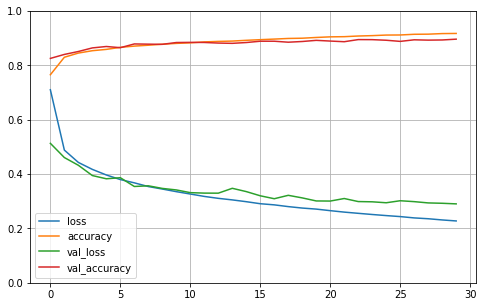

In [28]:
import pandas as pd #Plot learning curve
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.show()

In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2) #Evaluate the test accuracy
print("\nTest accuracy: ", test_acc)

313/313 - 1s - loss: 0.3280 - accuracy: 0.8841 - 649ms/epoch - 2ms/step

Test accuracy:  0.8841000199317932


In [32]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) #Make prediction on the test dataset
predictions = probability_model.predict(X_test)
predictions[0]

np.argmax(predictions[0])

313/313 [==============================] - 1s 4ms/step


9

In [ ]:
#Task 9: data privacy and professional ethics

#Do not use content-related personal data without the consent person
#protect data by passwords and encription
#Inappropriate use of data

